In [4]:
%load_ext autoreload
%autoreload 2

import cortex
import numpy as np
import matplotlib.pyplot as pl
import sys

sys.path.append("..")

from prfpy.stimulus import PRFStimulus2D
from prfpy.grid import Iso2DGaussianGridder, Norm_Iso2DGaussianGridder, DoG_Iso2DGaussianGridder
from utils.utils import create_dm_from_screenshots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


SyntaxError: invalid syntax (grid.py, line 711)

In [ ]:
#load data

gauss = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-gauss_space-fsaverage.npy")
norm_grid = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_gridparams-norm_space-fsaverage.npy") 
norm_an = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_analytic.npy")
#norm_num = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_numerical.npy")
dog_res= np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-dog_space-fsaverage.npy")
css_res= np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-css_space-fsaverage.npy")
norm_unbound = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_unbounded.npy")
norm_combined=np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_norm-iterparams-combined_space-fsaverage.npy")
norm_powell=np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_powell.npy")
norm_num_fix = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_num_bounds_fixed.npy")

rsq_map = gauss[:,-1]>0.2
nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/sub-001_nonzerovar-mask_space-fsaverage.npy")

norm_res = norm_num_fix

In [3]:
#plot rsq on cortex

rsq_models = np.zeros((nonzerovar_mask.shape[0],4))

rsq_models[nonzerovar_mask,0] = css_res[:, -1]
rsq_models[nonzerovar_mask,1] = dog_res[:, -1]
rsq_models[nonzerovar_mask,2] = norm_res[:, -1]
rsq_models[nonzerovar_mask,3] = gauss[:,-1]

alpha = rsq_models.mean(-1)
alpha1 = rsq_models.mean(-1)+np.random.rand(len(alpha))*1e-8
alpha2 = rsq_models.mean(-1)+np.random.rand(len(alpha))*1e-8
alpha3 = rsq_models.mean(-1)+np.random.rand(len(alpha))*1e-8
alpha4 = rsq_models.mean(-1)+np.random.rand(len(alpha))*1e-8
alpha5 = rsq_models.mean(-1)+np.random.rand(len(alpha))*1e-8

NameError: name 'nonzerovar_mask' is not defined

In [15]:
rsq_diff_cssgauss = cortex.Vertex2D(rsq_models[:,0]-rsq_models[:,3], alpha, subject='fsaverage',
                                          vmin=-0.05, vmax=0.05, vmin2=0.3, vmax2=0.6, cmap='RdBu_r_alpha')

rsq_diff_doggauss = cortex.Vertex2D(rsq_models[:,1]-rsq_models[:,3], alpha1, subject='fsaverage',
                                          vmin=-0.05, vmax=0.05, vmin2=0.3, vmax2=0.6, cmap='RdBu_r_alpha')

rsq_diff_normgauss = cortex.Vertex2D(rsq_models[:,2]-rsq_models[:,3], alpha2, subject='fsaverage',
                                          vmin=-0.05, vmax=0.05, vmin2=0.3, vmax2=0.6, cmap='RdBu_r_alpha')

rsq_diff_normdog = cortex.Vertex2D(rsq_models[:,2]-rsq_models[:,1], alpha3, subject='fsaverage',
                                          vmin=-0.05, vmax=0.05, vmin2=0.3, vmax2=0.6, cmap='RdBu_r_alpha')

rsq_diff_normcss = cortex.Vertex2D(rsq_models[:,2]-rsq_models[:,0], alpha4, subject='fsaverage', 
                                          vmin=-0.05, vmax=0.05, vmin2=0.3, vmax2=0.6, cmap='RdBu_r_alpha')

#NOTE: MULTIPLE VERTEX2D IN ONE DATASET = BUGGY
ds_rsq = {'CSS - Gauss':rsq_diff_cssgauss, 'DoG -  Gauss':rsq_diff_doggauss, 'Norm - Gauss':rsq_diff_normgauss}#,
   # 'Norm - DoG':rsq_diff_normdog, 'Norm - CSS':rsq_diff_normcss}

cortex.webshow(rsq_diff_doggauss,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=False, 
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 17716


<JS: window.viewer>

Stopping server


In [1]:
#plot ecc on cortex

ecc_models = np.zeros((nonzerovar_mask.shape[0],4))

ecc_models[nonzerovar_mask,0] = np.sqrt(css_res[:,0]**2+css_res[:,1]**2)
ecc_models[nonzerovar_mask,1] = np.sqrt(dog_res[:,0]**2+dog_res[:,1]**2)
ecc_models[nonzerovar_mask,2] = np.sqrt(norm_res[:,0]**2+norm_res[:,1]**2)
ecc_models[nonzerovar_mask,3] = np.sqrt(gauss[:,0]**2+gauss[:,1]**2)

ds_ecc = {#ecc_css=cortex.Vertex2D(ecc_models[:,0], subject='fsaverage'),
                        #ecc_dog=cortex.Vertex2D(ecc_models[:,1], subject='fsaverage'), 
                        'ecc_norm':cortex.Vertex2D(ecc_models[:,3], alpha3, subject='fsaverage',
                                vmin=0, vmax=10, vmin2=0.3, vmax2=0.6, cmap='RdBu_r_alpha')}

cortex.webgl.show(ds_ecc,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=False, 
                 with_borders=True, 
                 with_colorbar=True)

NameError: name 'np' is not defined

In [13]:
#plot polar angle on cortex

polar_models = np.zeros((nonzerovar_mask.shape[0],4))

polar_models[nonzerovar_mask,0] = np.arctan2(css_res[:,1], css_res[:,0])
polar_models[nonzerovar_mask,1] = np.arctan2(dog_res[:,1], dog_res[:,0])
polar_models[nonzerovar_mask,2] = np.arctan2(norm_res[:,1], norm_res[:,0])
polar_models[nonzerovar_mask,3] = np.arctan2(gauss[:,1], gauss[:,0])

ds_polar = {#'polar_css':cortex.Vertex2D(polar_models[:,0], alpha3, subject='fsaverage',
            #            vmin=-3.14, vmax=3.14, vmin2=0.3, vmax2=0.6, cmap='Retinotopy_RYBCR_alpha'),
            #            'polar_dog':cortex.Vertex2D(polar_models[:,1], alpha2, subject='fsaverage',
            #            vmin=-3.14, vmax=3.14, vmin2=0.3, vmax2=0.6, cmap='Retinotopy_RYBCR_alpha'), 
                        'polar_norm':cortex.Vertex2D(polar_models[:,2], alpha, subject='fsaverage',
                        vmin=-3.14, vmax=3.14, vmin2=0.3, vmax2=0.6, cmap='Retinotopy_RYBCR_alpha')}

cortex.webgl.show(ds_polar,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=False, 
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 37055


<JS: window.viewer>

Stopping server


In [40]:
#further parameters plot on cortex
baselines = np.zeros((nonzerovar_mask.shape[0],2))

baselines[nonzerovar_mask,0] = norm_res[:,5]
baselines[nonzerovar_mask,1] = norm_res[:,8]

ds_baselines=cortex.Dataset(neural_baseline=cortex.Vertex(baselines[:,0], subject='fsaverage'),
                           surround_baseline=cortex.Vertex(baselines[:,1], subject='fsaverage'))

cortex.webgl.show(ds_baselines,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=False, 
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 2821


<JS: window.viewer>

<IPython.core.display.Javascript object>


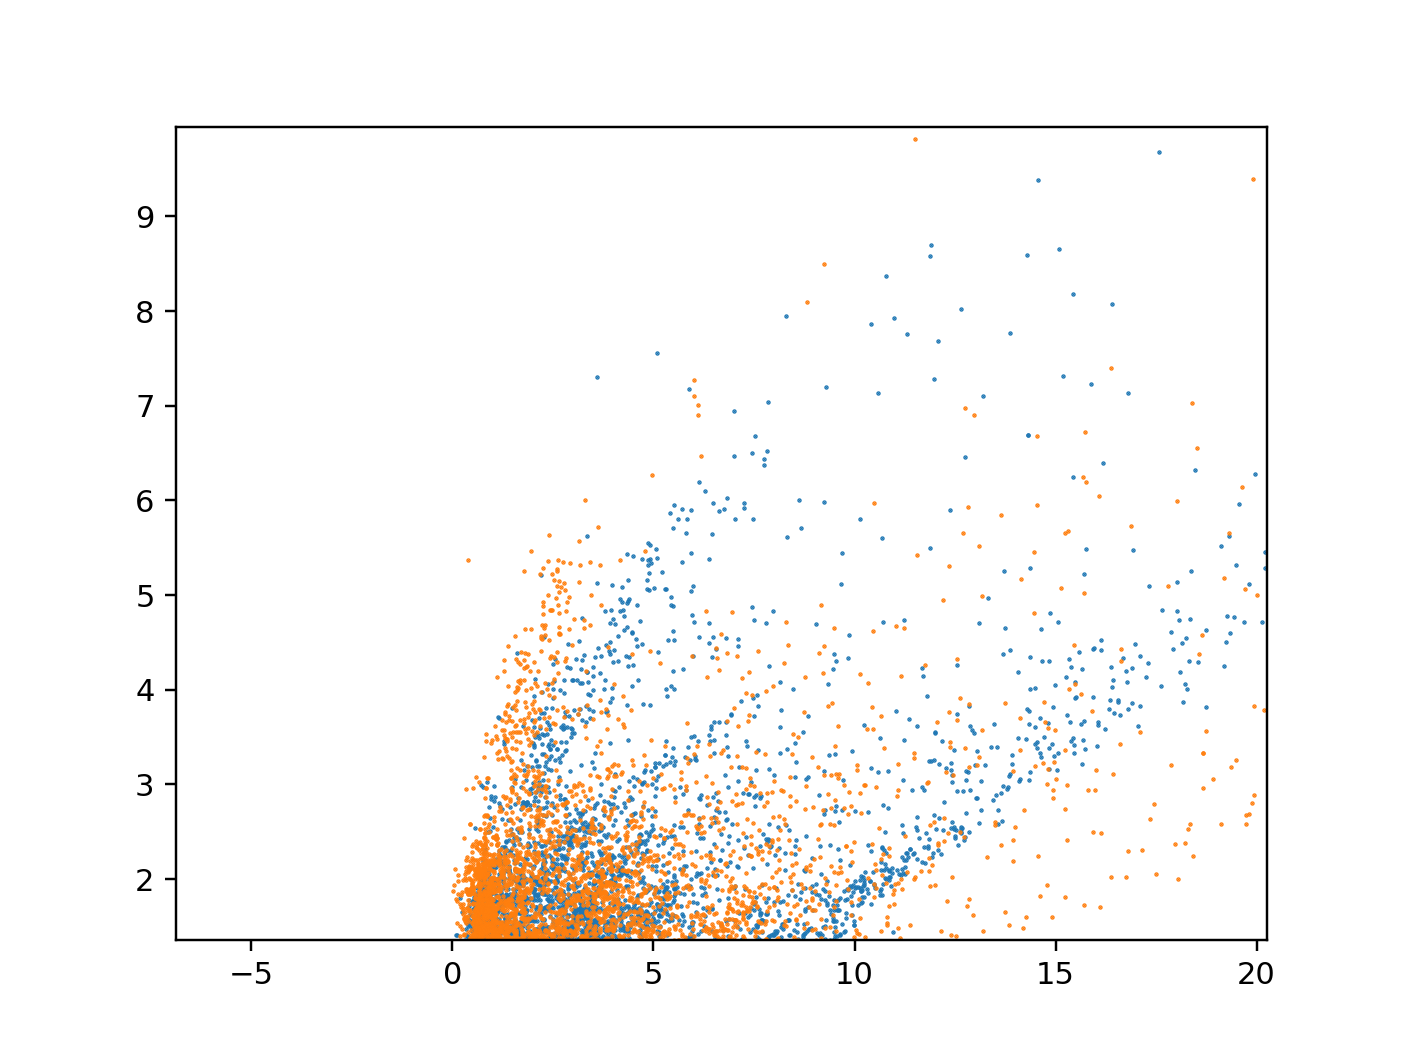

In [9]:
#eccentricity-size relationship
%matplotlib notebook
pl.figure()

pl.scatter(np.sqrt(gauss[rsq_map,0]**2+gauss[rsq_map,1]**2), gauss[rsq_map,2], s=0.2)
#pl.scatter(np.sqrt(css_res[rsq_map,0]**2+css_res[rsq_map,1]**2), css_res[rsq_map,2], s=1)
pl.scatter(np.sqrt(norm_res[rsq_map,0]**2+norm_res[rsq_map,1]**2), norm_res[rsq_map,2], s=0.2)

In [ ]:
#further parameter relationships



In [ ]:
######################################################################################

In [ ]:
#the following cells are in case we want to quickly look at some specific model/data timecourse

In [ ]:
#create stim, load timecourse
timecourse=np.load("/Users/marcoaqil/PRFMapping/sub-001_timecourse_space-fsaverage.npy")

dm_list = []
for screenshot_path in screenshot_paths:
    # create stimulus
    dm_list.append(create_dm_from_screenshots(screenshot_path,
                                              n_pix)[..., discard_volumes:])

task_lengths = [dm.shape[-1] for dm in dm_list]
dm_full = np.concatenate(tuple(dm_list), axis=-1)

prf_stim = PRFStimulus2D(screen_size_cm=39.3,
                         screen_distance_cm=210,
                         design_matrix=dm_full,
                         TR=1.5)

In [ ]:
%matplotlib notebook
vox_num=50370
fig=pl.figure()
window_length=121
hrf=[1,1,0]

#initialize models (gg does both regular gaussian and CSS)
gg = Iso2DGaussianGridder(stimulus=prf_stim,
                          hrf=hrf,
                          filter_predictions=True,
                          window_length=window_length,
                          task_lengths=task_lengths)

gg_norm = Norm_Iso2DGaussianGridder(stimulus=prf_stim,
                                    hrf=hrf,
                                    filter_predictions=True,
                                    window_length=window_length,
                                    task_lengths=task_lengths)

gg_dog = DoG_Iso2DGaussianGridder(stimulus=prf_stim,
                                  hrf=hrf,
                                  filter_predictions=True,
                                  window_length=window_length,
                                  task_lengths=task_lengths)


#create timecourses
tc_vox=timecourse[vox_num]
norm_grid_tc=gg_norm.return_single_prediction(*list(norm_grid[vox_num,:-1]))
norm_iter_tc=gg_norm.return_single_prediction(*list(norm_num[vox_num,:-1]))
gauss_tc=gg.return_single_prediction(*list(gauss[vox_num,:-1]))

pl.plot(tc_vox)
pl.plot(norm_grid_tc)
pl.plot(norm_iter_tc)

print(1-np.sum((tc_vox-norm_grid_tc)**2)/(1180*np.var(tc_vox)))
print(1-np.sum((tc_vox-norm_iter_tc)**2)/(1180*np.var(tc_vox)))
print(1-np.sum((tc_vox-gauss_tc)**2)/(1180*np.var(tc_vox)))

print(norm_grid[vox_num])
print(norm_num[vox_num])